<a href="https://colab.research.google.com/github/dhruvi003/IDS-model/blob/main/black_friday_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# we wish to understand the purchase summary of various customers for high volume products
# build a model to predict the purchase ampunt of customer against various products which will help them to create presonalized offer for customers against different produts

"""
whenever we are given two different datasets, train and test, we combine them
"""

In [4]:
df_test = pd.read_csv('/content/test.csv')

In [20]:
# merge both train and test data
df = pd.concat([df_train, df_test])
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51027,1000649,P00331942,M,26-35,4.0,B,2,1.0,5.0,NaN,NaN,NaN
51028,1000651,P00004542,M,36-45,7.0,B,2,0.0,5.0,8.0,NaN,NaN
51029,1000651,P00220142,M,36-45,7.0,B,2,0.0,1.0,15.0,NaN,NaN
51030,1000651,P00190842,M,36-45,7.0,B,2,0.0,2.0,5.0,12.0,NaN


In [ ]:
# basic
df.info()
# we see that which are object and which are int and why

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [21]:
# we can blindly delete user_id, which is useless here
df.drop('User_ID', axis=1, inplace=True)

In [22]:
# now, we will handle categorical features
# 1) first, we will handle gender. here, we use map function
# when we see F - 0 and M - 1
df['Gender'] = df['Gender'].map({'F':0, 'M':1})

In [23]:
# handle categorical feature
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', '26-',
       nan], dtype=object)

In [24]:
# here, we can do encoding.
# we can directly do get_dummies

# pd.get_dummies(df['Age'],drop_first=True)

# here, 0-17 in e-commerce, is very less. so we should do ordinal encoding here
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

# label encoding will also work. (by importing library)

In [10]:
df.head(5
)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0.0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0.0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1.0,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


According to me ranking Age should be according to correlation between Purchase numbers and Age group. E.g. High Purchase number age group sb ranked with high number. then will make prediction with considering these rank numbers too. I did like this accordingly:

dict = {k:i for i,k in enumerate(df.groupby("Age")["Purchase"].mean().sort_values().index,1)}

df["Age_Group_Encoded"] = df["Age"].map(dict)

In [27]:
# another category is city
# here, we will use pd.get_dummies
# df['City_Category'].unique()
# df['City_Category'].dtype
df_city = pd.get_dummies(df['City_Category'], drop_first=True).astype(int)
# df = pd.concat([df,df_city], axis=1)
# df.drop(df['City_Category'], axis=1, inplace=True)

In [28]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
51027,1,0
51028,1,0
51029,1,0
51030,1,0


In [29]:
df = pd.concat([df,df_city], axis=1)
df.drop('City_Category', axis=1, inplace=True)

In [30]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1.0,7.0,16.0,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [33]:
# now, let's handle null values
df.isnull().sum()
# df['Age'].unique()

,0
Product_ID,0
Gender,1
Age,2
Occupation,2
Stay_In_Current_City_Years,2
Marital_Status,2
Product_Category_1,2
Product_Category_2,22953
Product_Category_3,51290
Purchase,51033


In [41]:
# now, we will focus on replacing null values
# in gender, i will use mode (most repeating value)
# same goes with occupation
df['Gender'].mode()
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])


In [42]:
df['Gender'].isnull().sum()

np.int64(0)

In [45]:
df['Occupation']=df['Occupation'].fillna(df['Occupation'].mode()[0])

In [47]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,2
Occupation,0
Stay_In_Current_City_Years,2
Marital_Status,2
Product_Category_1,2
Product_Category_2,22953
Product_Category_3,51290
Purchase,51033


3229

In [50]:
product_counts_by_age_and_product = df.groupby(['Age', 'Product_ID']).size().reset_index(name='count')
print("Count of each product purchased by age group:")
display(product_counts_by_age_and_product)

Count of each product purchased by age group:


,Age,Product_ID,count
0,1.0,P00000142,14
1,1.0,P00000242,2
2,1.0,P00000342,2
3,1.0,P00000542,2
4,1.0,P00000742,1
...,...,...,...
13643,7.0,P0099042,1
13644,7.0,P0099242,1
13645,7.0,P0099342,1
13646,7.0,P0099442,2


In [ ]:
# how i wish to replace null age?
# i will find product_id for null age
# now, for that product_id, i will check in product_counts_by_age_and_product
# in product_counts_by_age_and_product, the maximum count for that product id
# and in that, related age


In [54]:
# Step 1: Identify rows with missing Age
null_age_indices = df[df['Age'].isnull()].index

In [ ]:
for index in null_age_indices:
  product_id = df.loc[index, 'Product_ID']

  product_counts = product_counts_by_age_and_product[product_counts_by_age_and_product['Product_ID'] == product_id]


In [ ]:
# i have product_id, age
# select age, product_id, count(product_id) as count from table group by age, product_id

In [58]:
# Step 2: Iterate and find product (and proceed to Step 3 and 4 within the loop)
for index in null_age_indices:
    product_ids = df.loc[index, 'Product_ID'] # Get potentially multiple product IDs
    if isinstance(product_ids, pd.Series):
        product_ids = product_ids.tolist() # Convert Series to list of product IDs
    else:
        product_ids = [product_ids] # Make it a list even if it's a single value

    for product_id in product_ids: # Iterate through product IDs for the current index
        # Step 3: Find age with max count for the product
        # Filter the product_counts_by_age_and_product for the current product_id
        product_counts = product_counts_by_age_and_product[
            product_counts_by_age_and_product['Product_ID'] == product_id
        ]

        # Find the age with the maximum count for this product
        if not product_counts.empty:
            # Get the age with the maximum count
            most_frequent_age = product_counts.loc[product_counts['count'].idxmax(), 'Age']

            # Step 4: Fill null Age (only fill if an age is found)
            df.loc[index, 'Age'] = most_frequent_age
            break # Assuming we only need to fill the age once per index, break after finding the first product's age
        else:
            # Handle cases where the product is not found in the counts DataFrame
            # For now, we'll just skip, but you might want a different strategy
            print(f"Product_ID {product_id} not found in product_counts_by_age_and_product for index {index}")

Product_ID P001766 not found in product_counts_by_age_and_product for index 51031


In [59]:
# Step 5: Verify nulls are filled
print("Remaining null values in 'Age' column:")
print(df['Age'].isnull().sum())

Remaining null values in 'Age' column:
1


In [60]:
# Fill the remaining null in 'Age' with the mode of the 'Age' column
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])

# Verify that there are no more null values in 'Age'
print("Remaining null values in 'Age' column after filling with mode:")
print(df['Age'].isnull().sum())

Remaining null values in 'Age' column after filling with mode:
0


In [62]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,2
Marital_Status,2
Product_Category_1,2
Product_Category_2,22953
Product_Category_3,51290
Purchase,51033


In [64]:
# now, let's do data exploration for product_category
df['Product_Category_2'].unique()
# this is discrete continous feature, each value is different it'll be repeated
# in discrete, if i have NaN, we can handle it
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,8551
14.0,7512
2.0,6660
16.0,5817
15.0,5069
5.0,3504
4.0,3420
6.0,2241
11.0,1870


In [66]:
# the best way is by mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [67]:
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,2
Marital_Status,2
Product_Category_1,2
Product_Category_2,0
Product_Category_3,0
Purchase,51033


In [69]:
df['Stay_In_Current_City_Years'].unique()
# we will treat 4+ as 4, and NaN with mode
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('4+', '4')

In [71]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].fillna(df['Stay_In_Current_City_Years'].mode()[0])

In [72]:
df.dtypes

,0
Product_ID,object
Gender,float64
Age,float64
Occupation,float64
Stay_In_Current_City_Years,object
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64
Product_Category_3,float64
Purchase,float64


In [73]:
# convert object into int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [74]:
df.dtypes


,0
Product_ID,object
Gender,float64
Age,float64
Occupation,float64
Stay_In_Current_City_Years,int64
Marital_Status,float64
Product_Category_1,float64
Product_Category_2,float64
Product_Category_3,float64
Purchase,float64


In [75]:
# vizualization
import seaborn as sns

<Axes: xlabel='Age', ylabel='Purchase'>

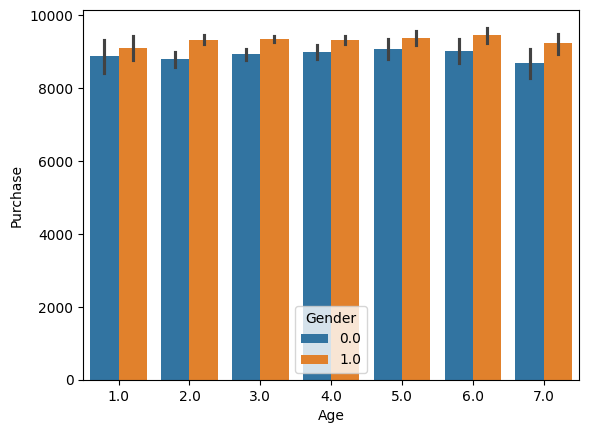

In [89]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
# This plot shows the average purchase amount for each age group, broken down by gender.
# We can observe that males tend to have slightly higher average purchases across all age groups.

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

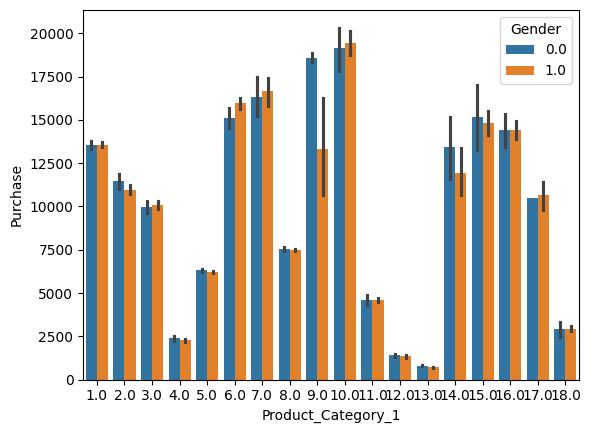

In [90]:
# let's check for product_category_1
df_reset = df.reset_index(drop=True)
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df_reset)
# This plot shows the average purchase amount for each Product Category 1, broken down by gender.
# It reveals that average purchase amounts vary significantly across product categories,
# and the gender difference in spending is also visible and varies by category.

In [82]:
# Bar plot of 'City_Category' vs. 'Purchase' with Gender hue
sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=df_reset)
plt.title('Purchase Amount by City Category and Gender')
plt.show()

ValueError: Could not interpret value `City_Category` for `x`. An entry with this name does not appear in `data`.

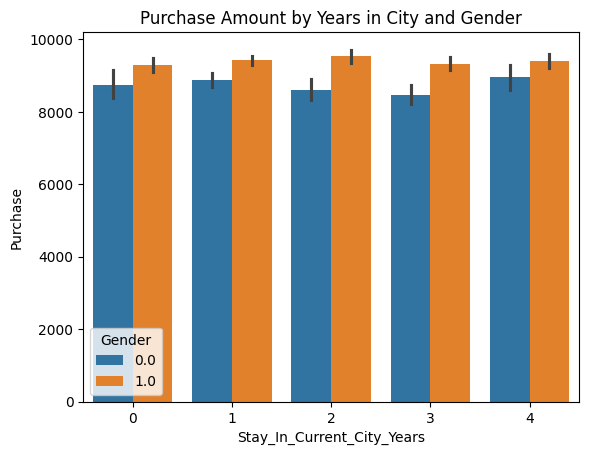

In [91]:
import matplotlib.pyplot as plt

# Bar plot of 'Stay_In_Current_City_Years' vs. 'Purchase' with Gender hue
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', data=df_reset)
plt.title('Purchase Amount by Years in City and Gender')
plt.show()
# This plot visualizes the average purchase amount based on how many years a customer
# has stayed in their current city, separated by gender. It suggests that the length
# of stay doesn't have a major impact on average purchase amount, with consistent
# gender differences across the years.

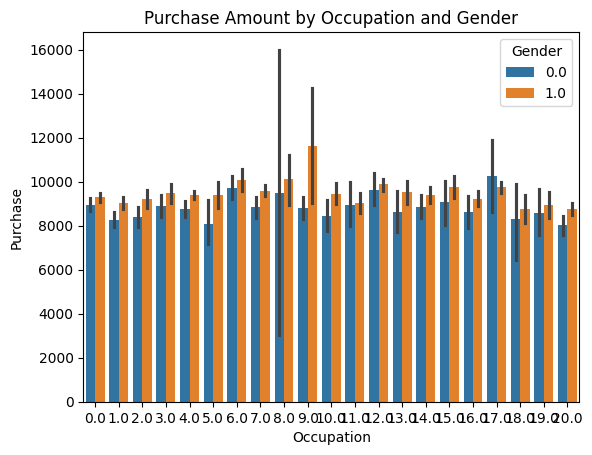

In [92]:
# Bar plot of 'Occupation' vs. 'Purchase' with Gender hue
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df_reset)
plt.title('Purchase Amount by Occupation and Gender')
plt.show()
# This plot shows the average purchase amount for each occupation category,
# differentiated by gender. It highlights that purchase amounts differ across
# occupations, and the gender spending gap is generally present.

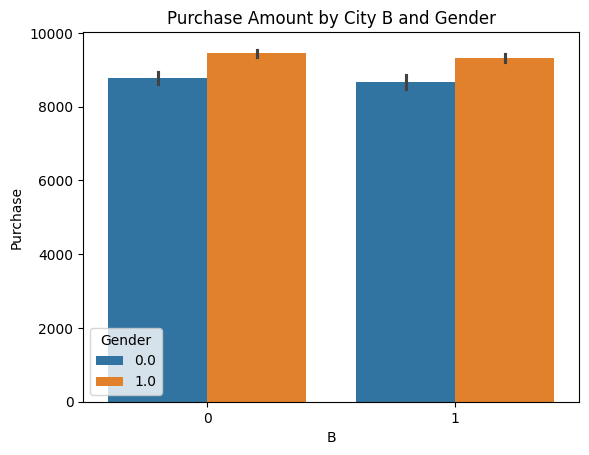

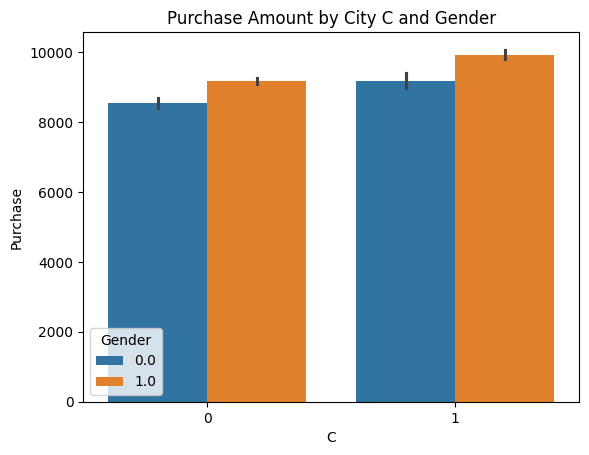

In [93]:
# Bar plot of 'B' vs. 'Purchase' with Gender hue
sns.barplot(x='B', y='Purchase', hue='Gender', data=df_reset)
plt.title('Purchase Amount by City B and Gender')
plt.show()
# This plot compares purchase amounts in City B (where B=1) vs. other cities (B=0),
# with gender as a hue. It helps understand the spending behavior in City B.

# Bar plot of 'C' vs. 'Purchase' with Gender hue
sns.barplot(x='C', y='Purchase', hue='Gender', data=df_reset)
plt.title('Purchase Amount by City C and Gender')
plt.show()
# This plot compares purchase amounts in City C (where C=1) vs. other cities (C=0),
# with gender as a hue. It helps understand the spending behavior in City C.

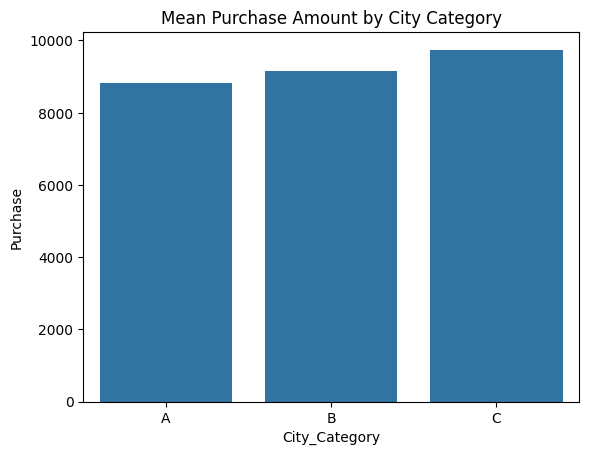

In [94]:
# Calculate mean purchase for each city category using the original df_train data
# We use df_train because df has been modified (City_Category dropped)
# If you prefer to use df_reset, you would need to recreate the City_Category column
mean_purchase_by_city = df_train.groupby('City_Category')['Purchase'].mean().reset_index()

# Bar plot of mean purchase by City Category
sns.barplot(x='City_Category', y='Purchase', data=mean_purchase_by_city)
plt.title('Mean Purchase Amount by City Category')
plt.show()
# This plot directly shows the average purchase amount for each of the original
# City Categories (A, B, and C), indicating which city category has the highest
# average spending.

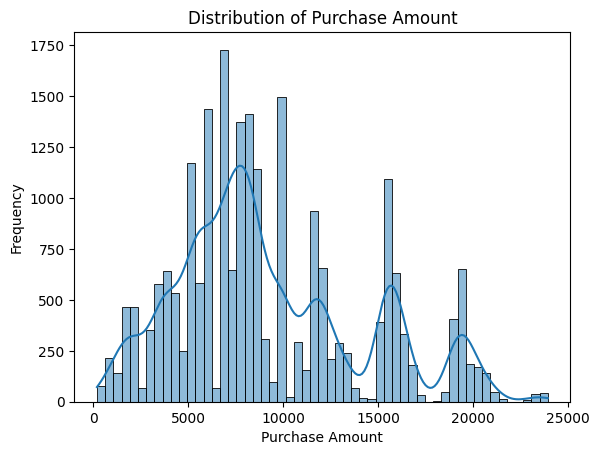

In [95]:
# Distribution plot of 'Purchase'
sns.histplot(df_reset['Purchase'].dropna(), kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()
# This plot shows the frequency distribution of purchase amounts.
# It helps us understand the typical range of spending and the overall
# pattern of purchases in the dataset.

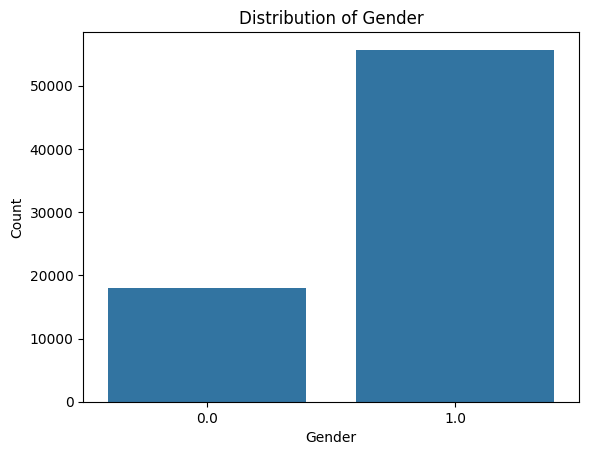

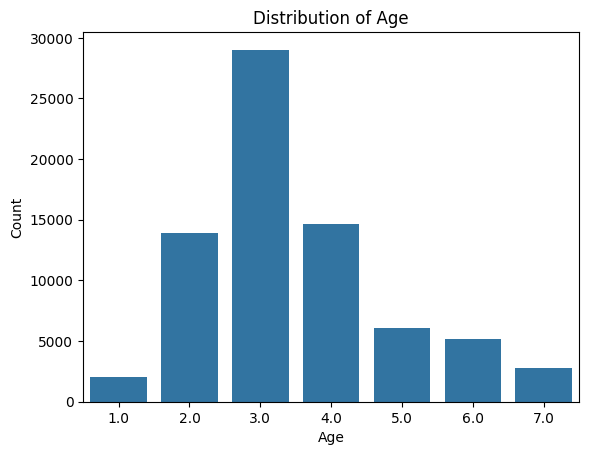

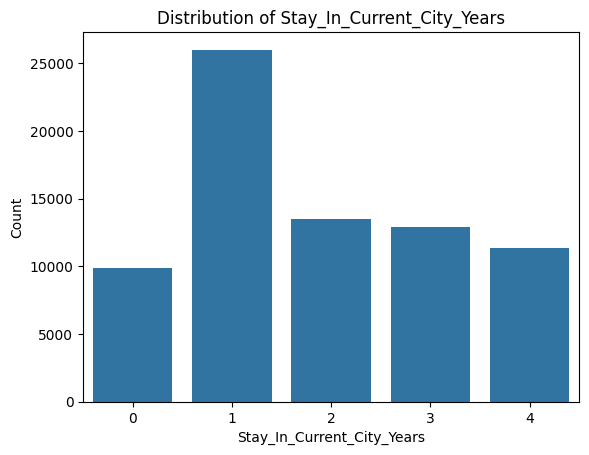

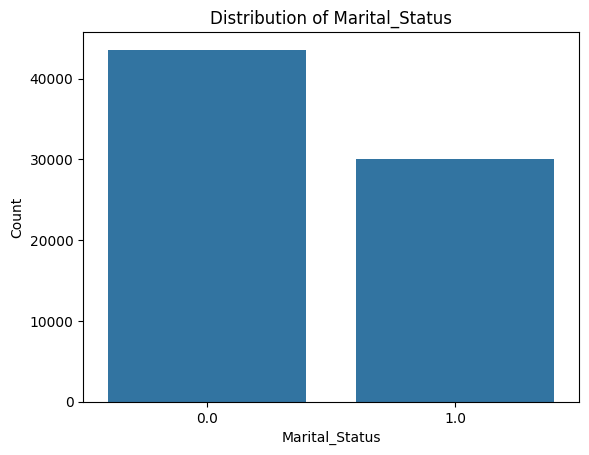

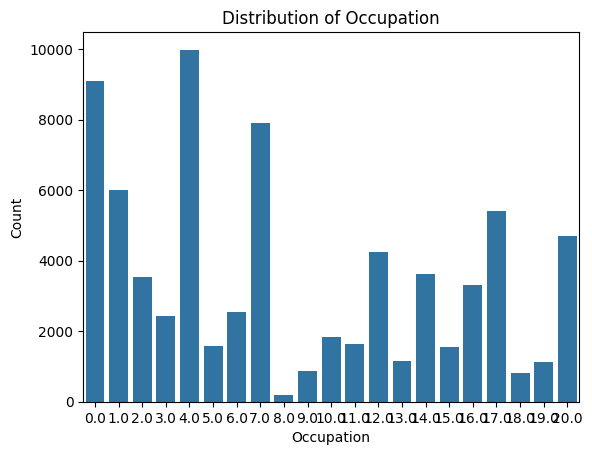

In [88]:
# Count plots for categorical features
categorical_cols = ['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'Occupation']

for col in categorical_cols:
    if col in df_reset.columns:
        sns.countplot(x=col, data=df_reset)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")